In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
boston_aux = load_boston()

In [4]:
dir(boston_aux)

['DESCR', 'data', 'feature_names', 'target']

In [6]:
boston = pd.DataFrame(data=boston_aux['data'],columns=boston_aux['feature_names'])

In [12]:
price = pd.DataFrame(data=boston_aux['target'],columns=['Price'])

In [15]:
data = pd.concat([boston,price],axis=1)

In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


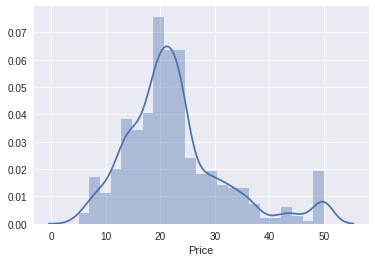

In [19]:
sns.distplot(data['Price'])

In [28]:
data_tratada = data [data['Price'] < 45]

In [29]:
data_tratada.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


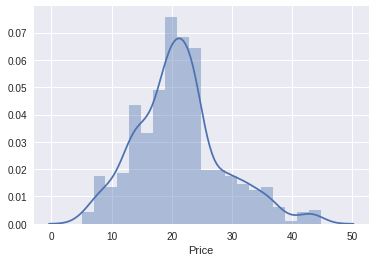

In [30]:
sns.distplot(data_tratada['Price'])

In [31]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [63]:
X = data_tratada[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT']]
y = data_tratada[['Price']]

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66)

In [66]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22
407,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54
249,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
91,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,3.0921,2.0,270.0,17.8,393.55,8.20


In [67]:
lm  = LinearRegression()

In [68]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
coeff_df = pd.DataFrame(lm.coef_[0],X.columns,["Coefficient"])

In [70]:
coeff_df

,Coefficient
CRIM,-0.099520
ZN,0.042399
INDUS,-0.038112
CHAS,0.239079
NOX,-8.872864
RM,3.392661
AGE,-0.027332
DIS,-1.098531
RAD,0.256958
TAX,-0.014781


In [71]:
predictions = lm.predict(X_test)

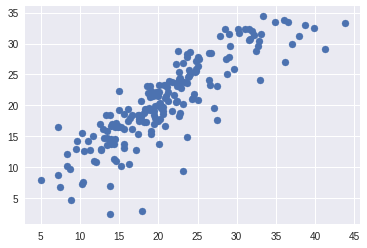

In [72]:
plot.scatter(y_test,predictions)

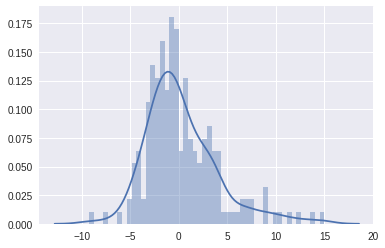

In [73]:
sns.distplot((y_test-predictions),bins=50);
#RESIDUO, y_test - predição.

In [74]:
from sklearn import metrics

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.72924174506
MSE: 13.9451394318
RMSE: 3.73431913899


 ainda tem mta diferença a predição   
 
 #tentar com menos variáveis.

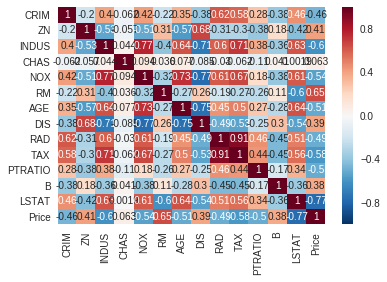

In [79]:

sns.heatmap(data_tratada.corr(),annot=True)

In [102]:
X = data_tratada[['CRIM', 'NOX', 'RM','LSTAT']]
y = data_tratada[['Price']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66)

In [104]:
lm  = LinearRegression()

In [105]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
predictions = lm.predict(X_test)

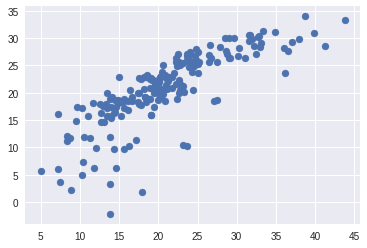

In [107]:
plot.scatter(y_test,predictions)

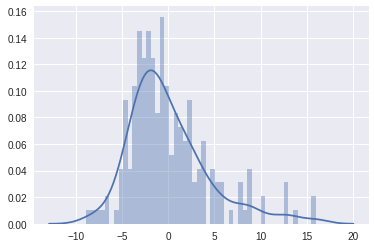

In [108]:
sns.distplot((y_test-predictions),bins=50);
#RESIDUO, y_test - predição.

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.25779091361
MSE: 19.0984201753
RMSE: 4.37017392964
